In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.metrics as skl_mt

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

url = 'training_data_VT2026.csv'
bikes = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()

c:\Users\elinm\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\elinm\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\elinm\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='hour_of_day', ylabel='hour_of_day'>,
        <Axes: xlabel='day_of_week', ylabel='hour_of_day'>,
        <Axes: xlabel='month', ylabel='hour_of_day'>,
        <Axes: xlabel='holiday', ylabel='hour_of_day'>,
        <Axes: xlabel='weekday', ylabel='hour_of_day'>,
        <Axes: xlabel='summertime', ylabel='hour_of_day'>,
        <Axes: xlabel='temp', ylabel='hour_of_day'>,
        <Axes: xlabel='dew', ylabel='hour_of_day'>,
        <Axes: xlabel='humidity', ylabel='hour_of_day'>,
        <Axes: xlabel='precip', ylabel='hour_of_day'>,
        <Axes: xlabel='snow', ylabel='hour_of_day'>,
        <Axes: xlabel='snowdepth', ylabel='hour_of_day'>,
        <Axes: xlabel='windspeed', ylabel='hour_of_day'>,
        <Axes: xlabel='cloudcover', ylabel='hour_of_day'>,
        <Axes: xlabel='visibility', ylabel='hour_of_day'>],
       [<Axes: xlabel='hour_of_day', ylabel='day_of_week'>,
        <Axes: xlabel='day_of_week', ylabel='day_of_week'>,
        <Axes: xlabel='month',

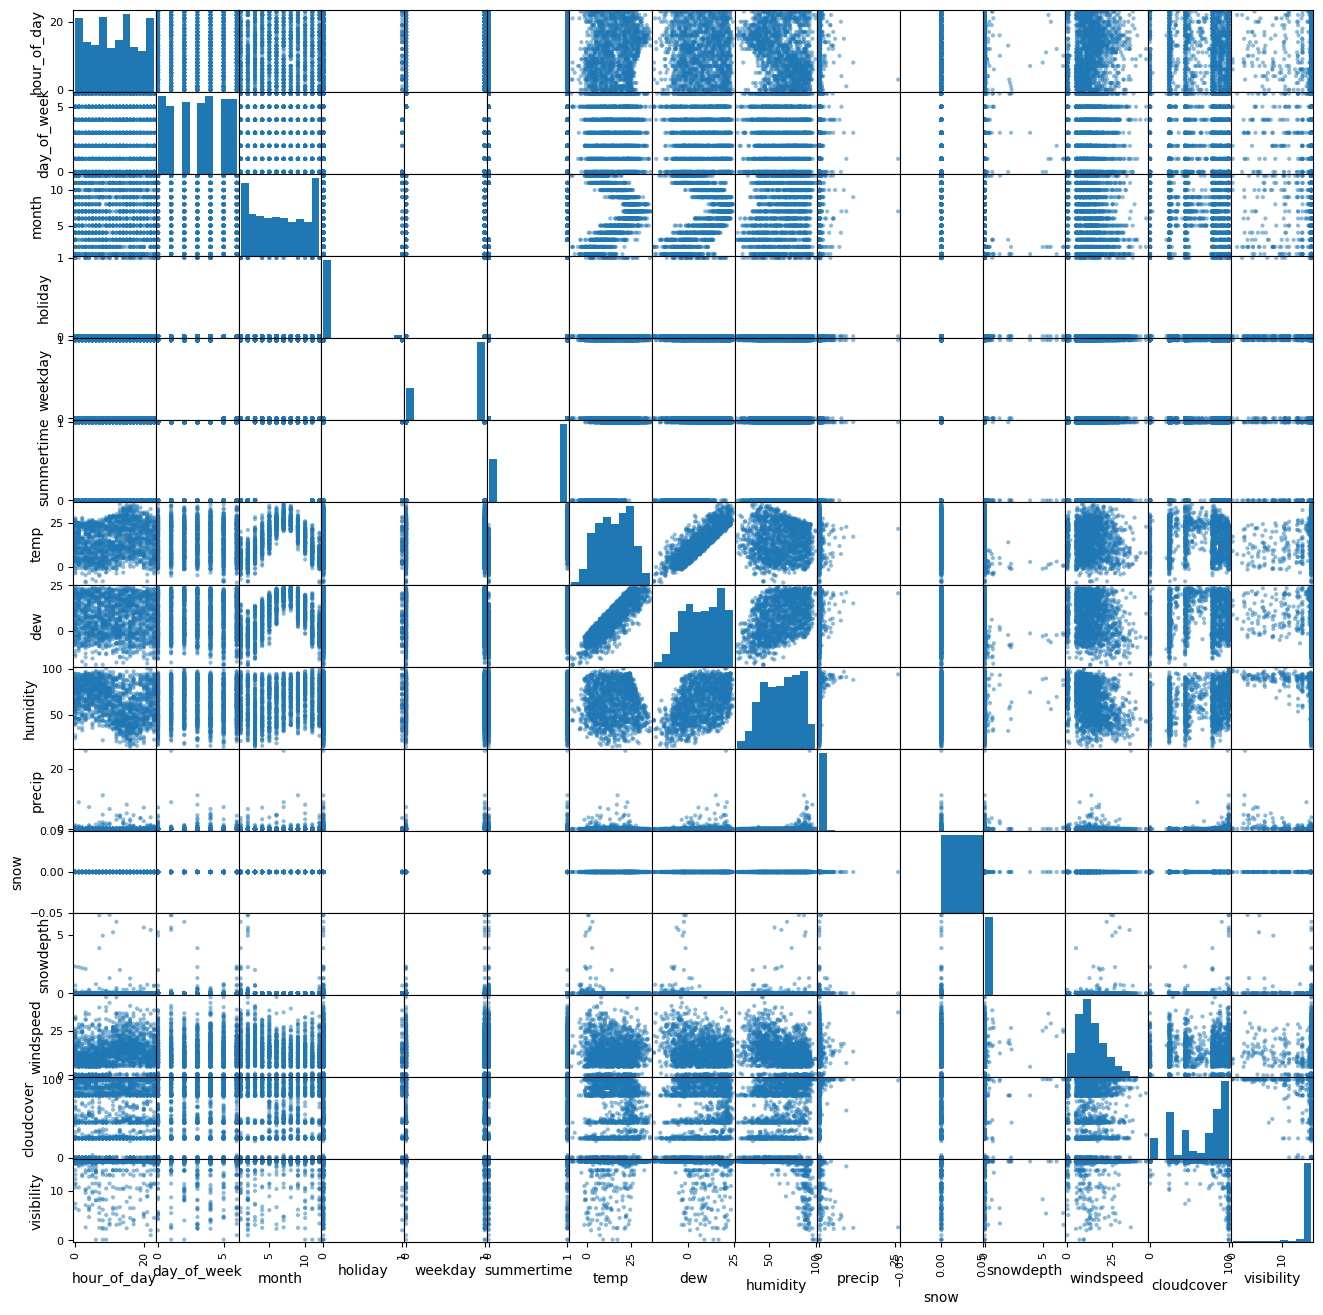

In [3]:
# print(bikes.describe())
pd.plotting.scatter_matrix(bikes, figsize=(16, 16))

In [4]:
from sklearn import model_selection as ms
[train, test] = ms.train_test_split(bikes)

In [6]:
model = skl_lm.LogisticRegression(max_iter=10000)
X_train = train.drop(columns=['increase_stock', 'humidity', 'cloudcover'])
y_train = train['increase_stock']

X_test = test.drop(columns=['increase_stock', 'humidity', 'cloudcover'])
y_test = test['increase_stock']

model.fit(X_train, y_train)

y_star = model.predict(X_test)

print(np.mean(y_star == y_test))

naive = ['low_bike_demand'] * len(y_test)
print(np.mean(naive == y_test))
# pd.crosstab(sanity_check, y_test)
pd.crosstab(y_star, y_test)

#skl_mt.

0.8675
0.8275


increase_stock,high_bike_demand,low_bike_demand
row_0,,
high_bike_demand,29,13
low_bike_demand,40,318
